# London bike sharing

Historical data for bike sharing in London 'Powered by TfL Open Data'
Dates: From January 2015 to March 2017

*Metadata:*

- "is_holiday": Boolean field - 1.0 holiday / 0.0 non-holiday
- "is_weekend": Boolean field - 1.0 if the day is weekend
- "season":
    - '0.0': Spring
    - '1.0': Summer
    - '2.0': Fall
    - '3.0': Winter
- "weather_code":
    - '1.0': Clear
    - '2.0': Scattered clouds
    - '3.0': Broken clouds
    - '4.0': Cloudy
    - '7.0': Light rain
    - '10.0': Rain with thunderstorm
    - '26.0': Snowfall
    - '94.0': Freezing Fog


# Imports

In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import matplotlib.ticker as mtick
plt.style.use('ggplot')
from matplotlib.pyplot import figure
pd.options.mode.chained_assignment = None

In [4]:
# import file

df = pd.read_csv(r'C:\Users\luisina.ravel\Project\london_bikes\london_merged.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


# Data cleaning and formating

In [6]:
# check if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    pct_missing_rounded = round(pct_missing*100, 2)
    print('{} - {}%'.format(col, pct_missing_rounded))

timestamp - 0.0%
cnt - 0.0%
t1 - 0.0%
t2 - 0.0%
hum - 0.0%
wind_speed - 0.0%
weather_code - 0.0%
is_holiday - 0.0%
is_weekend - 0.0%
season - 0.0%


In [7]:
# Check duplicated rows: True "duplicated" // False "no duplicated"

duplicated_rows = df.duplicated()
distribution = duplicated_rows.value_counts()
print(distribution)

False    17414
Name: count, dtype: int64


In [8]:
# rename columns

new_cols_dict ={
    'timestamp': 'time',
    'cnt': 'count_bikes',
    't1': 'temp Cº',
    't2':'feels like Cº',
    'hum':'hum%',
    'wind_speed':'wind_speed_km/h',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season': 'season' 
}

df.rename(new_cols_dict, axis=1, inplace= True)

new_cols_dict ={
    'timestamp': 'time',
    'cnt': 'count_bikes',
    't1': 'temp Cº',
    't2':'feels like Cº',
    'hum':'hum%',
    'wind_speed':'wind_speed_km/h',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season': 'season' 
}

df.rename(new_cols_dict, axis=1, inplace= True)

In [9]:
df

,time,count_bikes,temp Cº,feels like Cº,hum%,wind_speed_km/h,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [10]:
# dictionary for season / weather / is holiday / is weekend columns. 

weather_dict ={
    '1.0': 'Clear',
    '2.0': 'Scattered clouds',
    '3.0': 'Broken clouds',
    '4.0': 'Cloudy',
    '7.0': 'Light rain',
    '10.0': 'Rain with thunderstorm',
    '26.0': 'snowfall',
    '96.0': 'Freezing Fog'
}

season_dict ={
    '0.0': 'Spring',
    '1.0': 'Summer',
    '2.0': 'Fall',
    '3.0': 'Winter'
}

is_holiday_dict ={
    '0.0': 'Non Holiday',
    '1.0': 'Holiday'
}

is_weekend_dict ={
    '0.0': 'Weekday',
    '1.0': 'Weekend'
}

# change data from int64 to string

df.weather = df.weather.astype('str')
df.season = df.season.astype('str')
df.is_holiday = df.is_holiday.astype('str')
df.is_weekend = df.is_weekend.astype('str')

# mapping new values

df.weather = df.weather.map(weather_dict)
df.season = df.season.map(season_dict)
df.is_holiday = df.is_holiday.map(is_holiday_dict)
df.is_weekend = df.is_weekend.map(is_weekend_dict)

In [11]:
df.time = pd.to_datetime(df.time)

df.insert(1, 'date', df['time'].dt.date)
df.insert(2,'year', df['time'].dt.year)
df.insert(3, 'month', df['time'].dt.month)
df.insert(4, 'day', df['time'].dt.day)
df.insert(5, 'hour', df['time'].dt.hour)

In [13]:
df

,time,date,year,month,day,hour,count_bikes,temp Cº,feels like Cº,hum%,wind_speed_km/h,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,2015-01-04,2015,1,4,0,182,3.0,2.0,93.0,6.0,Broken clouds,Non Holiday,Weekend,Winter
1,2015-01-04 01:00:00,2015-01-04,2015,1,4,1,138,3.0,2.5,93.0,5.0,Clear,Non Holiday,Weekend,Winter
2,2015-01-04 02:00:00,2015-01-04,2015,1,4,2,134,2.5,2.5,96.5,0.0,Clear,Non Holiday,Weekend,Winter
3,2015-01-04 03:00:00,2015-01-04,2015,1,4,3,72,2.0,2.0,100.0,0.0,Clear,Non Holiday,Weekend,Winter
4,2015-01-04 04:00:00,2015-01-04,2015,1,4,4,47,2.0,0.0,93.0,6.5,Clear,Non Holiday,Weekend,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,2017-01-03,2017,1,3,19,1042,5.0,1.0,81.0,19.0,Broken clouds,Non Holiday,Weekday,Winter
17410,2017-01-03 20:00:00,2017-01-03,2017,1,3,20,541,5.0,1.0,81.0,21.0,Cloudy,Non Holiday,Weekday,Winter
17411,2017-01-03 21:00:00,2017-01-03,2017,1,3,21,337,5.5,1.5,78.5,24.0,Cloudy,Non Holiday,Weekday,Winter
17412,2017-01-03 22:00:00,2017-01-03,2017,1,3,22,224,5.5,1.5,76.0,23.0,Cloudy,Non Holiday,Weekday,Winter


# Relationship between temperature, wind speed and the quantity of bikes shared

In [12]:
# pivot table to show the Relationship

# bins
temp_bins = pd.cut(df['temp Cº'], bins=range(-2, 36, 2), right=False)  # Rangos de temperatura de 2 en 2 (-2 a 34)
wind_bins = pd.cut(df['wind_speed_km/h'], bins=range(0, 57, 5), right=False)  # Rangos de velocidad del viento de 5 en 5 (0 a 100)

# pivot table
pivot_table = pd.pivot_table(df, index=wind_bins, columns=temp_bins, values='count_bikes', aggfunc='sum', fill_value=0)

# Imprimir la tabla pivote
pivot_table


temp Cº,"[-2, 0)","[0, 2)","[2, 4)","[4, 6)","[6, 8)","[8, 10)","[10, 12)","[12, 14)","[14, 16)","[16, 18)","[18, 20)","[20, 22)","[22, 24)","[24, 26)","[26, 28)","[28, 30)","[30, 32)","[32, 34)"
wind_speed_km/h,,,,,,,,,,,,,,,,,,
"[0, 5)",2870,25411,29017,35945,41213,65766,50752,61336,33931,32732,24940,8808,5831,0,0,3723,0,0
"[5, 10)",18016,51104,113049,213961,257892,362696,366758,402379,350236,366456,279322,206632,121862,78136,32299,25323,3584,4614
"[10, 15)",1198,20122,135326,229265,351769,362404,442651,523378,537297,548745,515695,333298,241706,108907,62057,20042,6605,7867
"[15, 20)",77,12353,74767,140419,372470,439504,407996,684925,722533,683397,610591,579243,348973,195949,61684,23630,29933,18440
"[20, 25)",0,0,32540,95163,176632,267470,310371,339334,363314,482439,410590,397046,230865,98885,72739,30236,15339,5853
"[25, 30)",0,0,3205,55029,99943,172207,214870,270965,227982,190864,201796,215854,198380,73933,22160,2720,5046,0
"[30, 35)",0,0,140,22044,41835,63365,91754,155243,104526,81686,66580,40911,49764,28090,10289,0,0,0
"[35, 40)",0,0,0,2427,20234,17958,37448,55804,43024,23216,12767,9234,0,0,0,0,0,0
"[40, 45)",0,0,0,0,1266,7690,17024,13277,16495,13568,2631,0,0,0,0,0,0,0


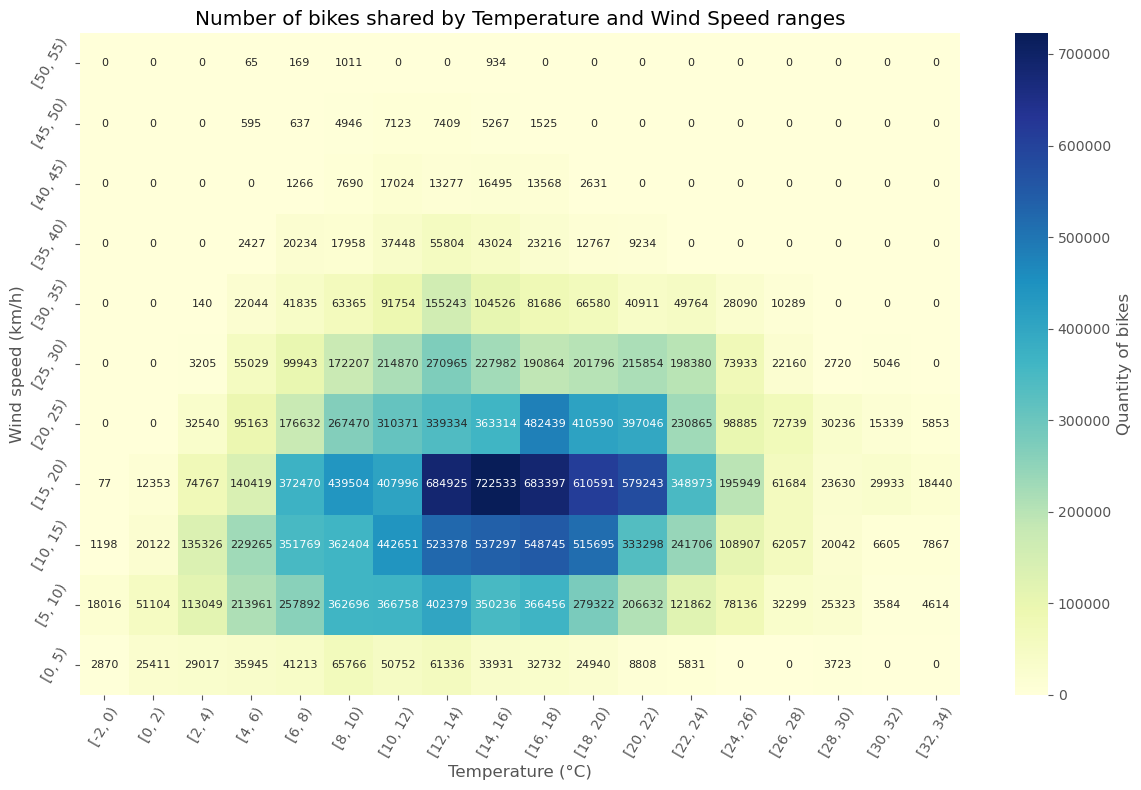

In [18]:
# heatmap to see the data in a better way

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', annot_kws={'size': 8}, cbar_kws={'label': 'Quantity of bikes'})
plt.title('Number of bikes shared by Temperature and Wind Speed ranges')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind speed (km/h)')
plt.gca().invert_yaxis()
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusion: The highest number of bikesharing occurs when the temperature ranges are in the range of 6º to 24º and the speed of wind beetwen 5 to 25 km/h

# Distribution according to "Weather", " Season", "Weekend" and "Holiday"

## 1. Weather status

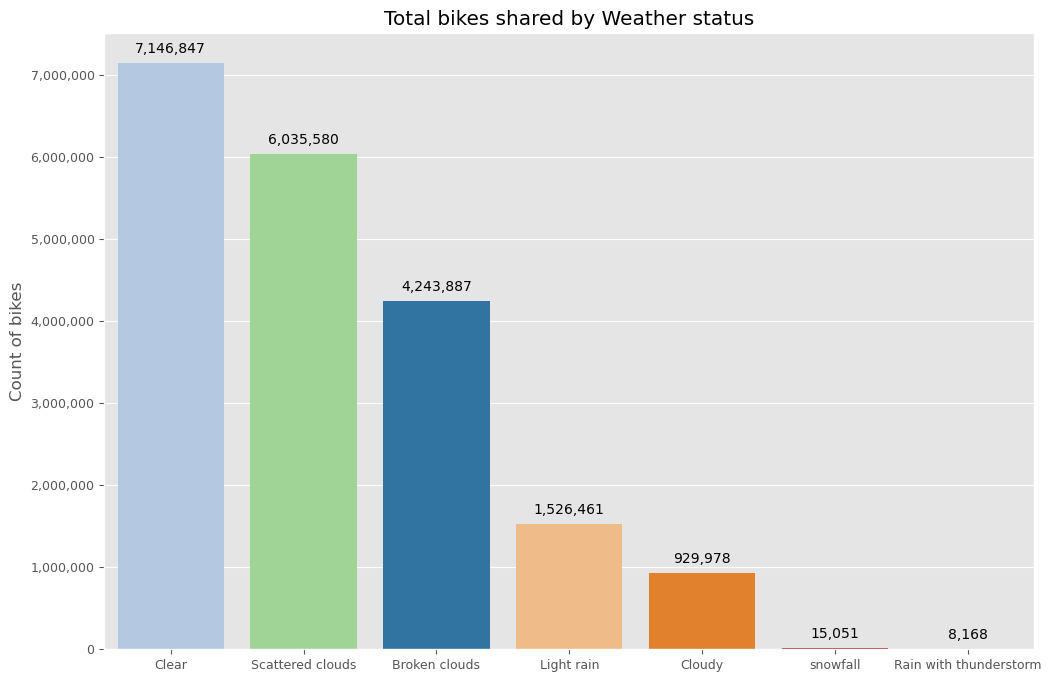

In [13]:
bike_demand_by_weather = df.groupby('weather')['count_bikes'].sum().reset_index()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='weather', y='count_bikes', data=bike_demand_by_weather, hue='weather', palette="tab20", order=bike_demand_by_weather.sort_values('count_bikes', ascending=False)['weather'], legend=False)

plt.title('Total bikes shared by Weather status')
plt.ylabel('Count of bikes')
plt.xlabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()


Conclusion: The state of the weather has a considerable impact

## 2. Season

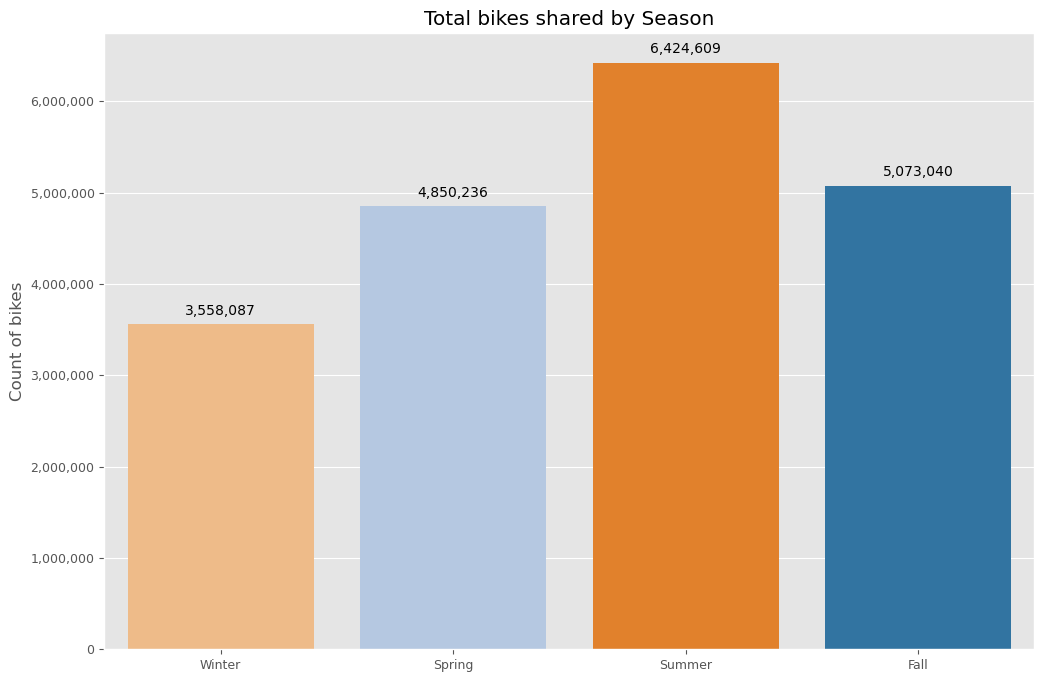

In [14]:
bike_demand_by_season = df.groupby('season')['count_bikes'].sum().reset_index()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='season', y='count_bikes', data=bike_demand_by_season, hue='season', palette="tab20", order=season_order, legend=False)
plt.title('Total bikes shared by Season')
plt.ylabel('Count of bikes')
plt.xlabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()


Conclusion: Bikes are used during all seasons, mostly during summer and autumn. The variation between MAX (summer) and MIN (winter) is 44.6% less.

## 3. Weekend

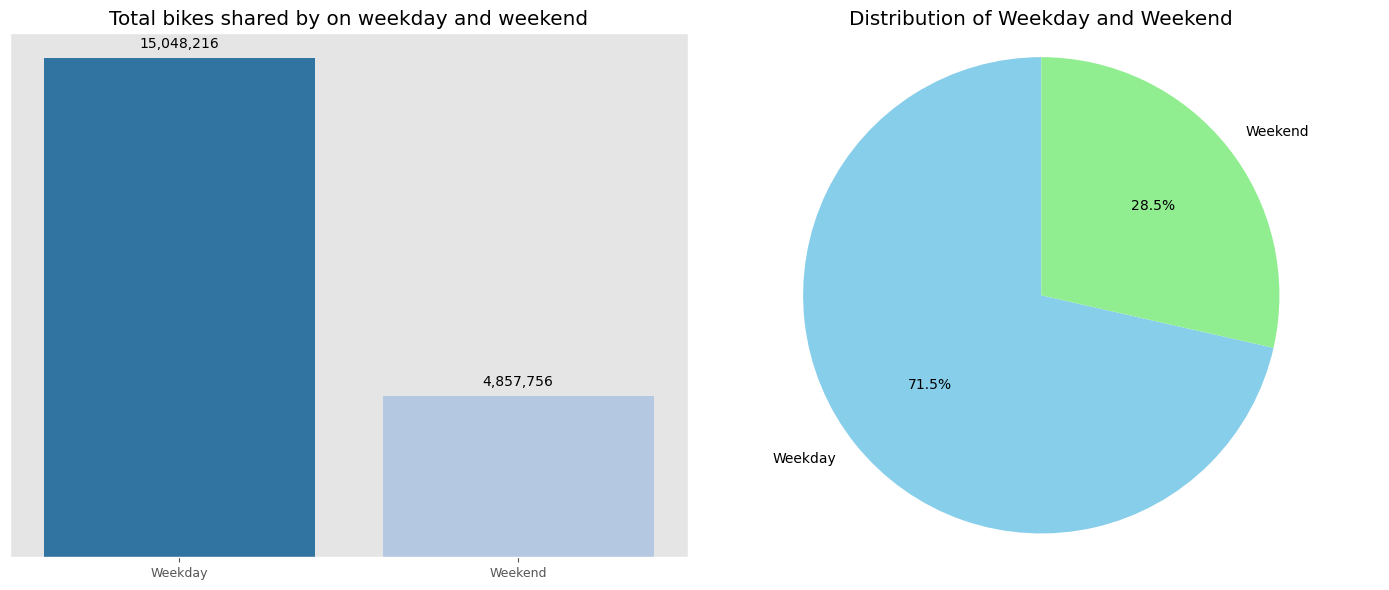

In [17]:
# Figure and matrix size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# bar graphic
bike_demand_by_weekend = df.groupby('is_weekend')['count_bikes'].sum().reset_index()
ax = sns.barplot(x='is_weekend', y='count_bikes', data=bike_demand_by_weekend, palette="tab20", hue='is_weekend', ax=axes[0], legend=False)
ax.set_title('Total bikes shared by on weekday and weekend')
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', labelsize=9)
ax.set_yticks([])

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    
# pie chart
weekday_percentage = (df['is_weekend'].value_counts(normalize=True) * 100)['Weekday']
weekend_percentage = (df['is_weekend'].value_counts(normalize=True) * 100)['Weekend']

axes[1].pie([weekday_percentage, weekend_percentage], labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axes[1].set_title('Distribution of Weekday and Weekend')
axes[1].axis('equal')
axes[1].tick_params(labelsize=9)

# avoid overlaps
plt.tight_layout()

plt.show()

Conclusion: High variation in cycling between weekday and weekend use. Preference: Weekday

# 4. Holiday

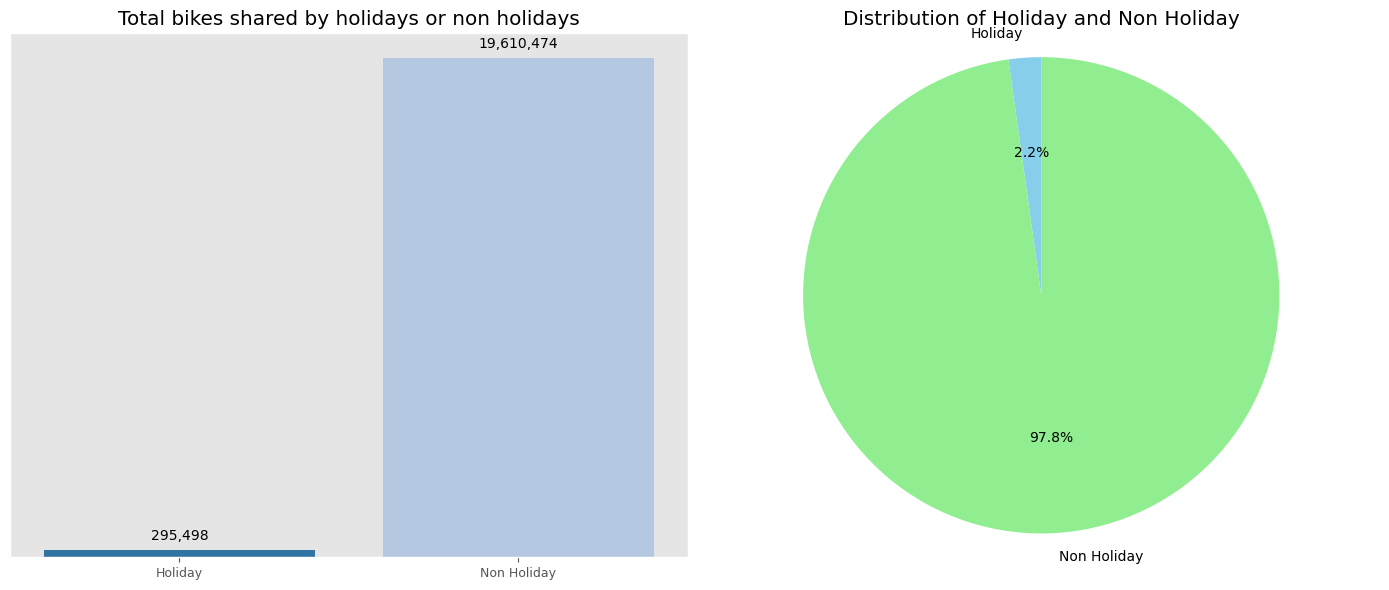

In [18]:
# Figure and matrix size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# bar graphic
bike_demand_by_holidays = df.groupby('is_holiday')['count_bikes'].sum().reset_index()
ax = sns.barplot(x='is_holiday', y='count_bikes', data=bike_demand_by_holidays, palette="tab20", ax=axes[0], hue='is_holiday', legend=False)
ax.set_title('Total bikes shared by holidays or non holidays')
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', labelsize=9)
ax.set_yticks([])

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    
# pie chart
weekday_percentage = (df['is_holiday'].value_counts(normalize=True) * 100)['Holiday']
weekend_percentage = (df['is_holiday'].value_counts(normalize=True) * 100)['Non Holiday']

axes[1].pie([weekday_percentage, weekend_percentage], labels=['Holiday', 'Non Holiday'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axes[1].set_title('Distribution of Holiday and Non Holiday')
axes[1].axis('equal')
axes[1].tick_params(labelsize=9)

# avoid overlaps
plt.tight_layout()

plt.show()

Conclusion: High variation in cycling between Holidays and Non Holidays use. Preference: Non Holidays

# Distribution by hour

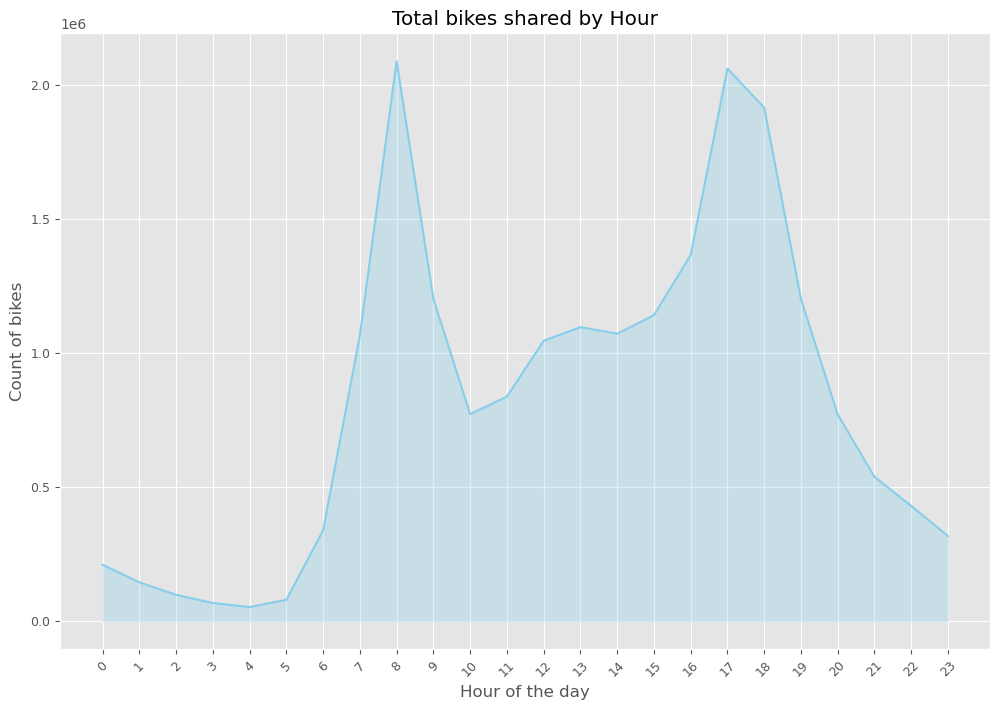

In [252]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='hour', y='count_bikes', data=bike_demand_by_hour, color='skyblue')

plt.fill_between(bike_demand_by_hour['hour'], bike_demand_by_hour['count_bikes'], color='skyblue', alpha=0.3)

plt.title('Total bikes shared by Hour')
plt.ylabel('Count of bikes')
plt.xlabel('Hour of the day')
plt.xticks(bike_demand_by_hour['hour'], fontsize=9, rotation=45)
plt.yticks(fontsize=9)

plt.show()

Conclusion: Peaks occur between office hours. 8am and between 5pm and 6pm